In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import pca
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

In [21]:
iris = load_iris()
print(iris.DESCR)
iris_data = iris.data
feature_names = iris.feature_names
iris_target = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
# 格式整理
iris_target.shape = (150,1)
iris_all = np.hstack((iris_data,iris_target))
# 转化为DataFrame
iris_data_df = DataFrame(iris_data,columns=feature_names)
iris_target_df = DataFrame(iris_target,columns=['target'])
iris_data_all_df = DataFrame(iris_all,columns=feature_names+['target'])

print(iris_data_all_df.head())
print(iris_data_all_df.tail())
print(iris_data_all_df.sample(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0        

In [23]:
print(iris_data_all_df.shape)
print(iris_data_all_df.dtypes)
print(iris_data_all_df.info())
print(iris_data_all_df.describe())

(150, 5)
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.1000

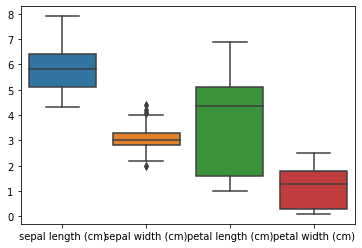

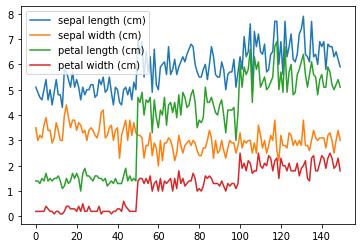

In [24]:
sns.boxplot(data=iris_data_df)
plt.show()
plt.plot(iris_data_df)
plt.legend(feature_names)
plt.show()

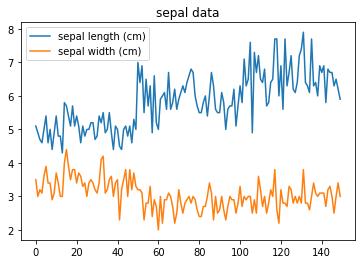

In [25]:
# sepal
sepal_data_df = iris_data_df[['sepal length (cm)','sepal width (cm)']]
plt.plot(sepal_data_df)
plt.legend(['sepal length (cm)','sepal width (cm)'])
plt.title('sepal data')
plt.show()

d:\Programing\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


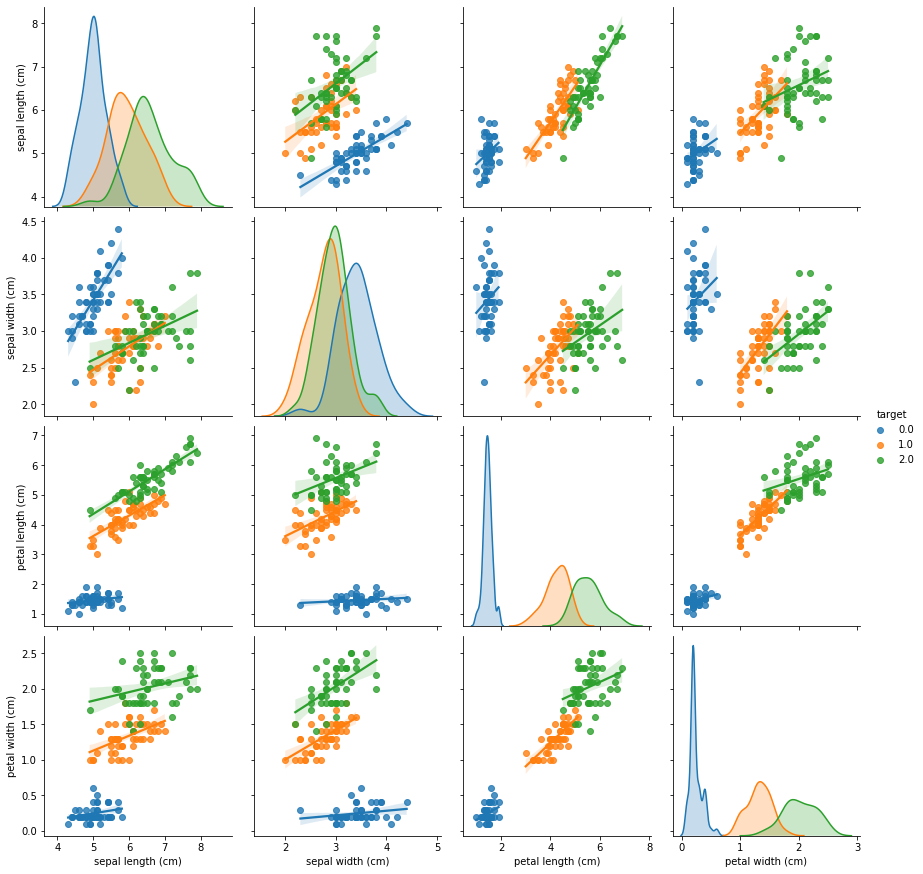

In [26]:
sns.pairplot(iris_data_all_df,vars=iris_data_all_df.columns[:4],hue='target',size=3,kind='reg')
plt.show()

In [27]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need 

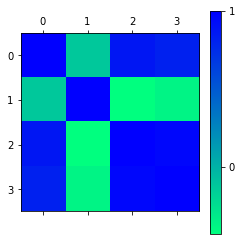

In [28]:
Corr_Mat = iris_data_df.corr()
Mat_img = plt.matshow(Corr_Mat,cmap = plt.cm.winter_r)
plt.colorbar(Mat_img,ticks = [-1,0,1])
plt.show()

In [49]:
# 数据降维
pca = pca(n_components = 2)
pca_2c = pca.fit_transform(iris_data_df)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

plt.scatter(pca_2c[:,0],pca_2c[:,1],c = np.array(iris_data_df),alpha=0.8,cmap=plt.cm.winter)
plt.show()

TypeError: 'module' object is not callable

Help on module sklearn.decomposition.pca in sklearn.decomposition:

NAME
    sklearn.decomposition.pca - # THIS FILE WAS AUTOMATICALLY GENERATED BY deprecated_modules.py

FUNCTIONS
    __getattr__(name)

DATA
    correct_import_path = 'sklearn.decomposition'
    deprecated_path = 'sklearn.decomposition.pca'

FILE
    d:\programing\anaconda\lib\site-packages\sklearn\decomposition\pca.py


None
